<a href="https://colab.research.google.com/github/Fahim136/Australian-Energy-Dataset-Analysis-Assignment/blob/main/Australian_Energy_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Configuring git***

In [ ]:
!apt-get install git -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git config --global user.name "Fahim Shariar"
!git config --global user.email "Shariarfahim356@gmail.com"

In [ ]:
!git clone https://github.com/Fahim136/Australian-Energy-Dataset-Analysis-Assignment.git

Cloning into 'Australian-Energy-Dataset-Analysis-Assignment'...


In [ ]:
%cd Australian-Energy-Dataset-Analysis-Assignment

/content/Australian-Energy-Dataset-Analysis-Assignment


deleted the main configuration part using remote url as it contained secret token and github raised a warning.

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


# ***Australian Energy Dataset Analysis***

In [1]:
# Import necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The sqlite3.Cursor class is an instance using which can invoke methods that execute SQLite statements, fetch data from the result sets of the queries.

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect("/content/AUS_energy_sqlite3.db")

# Get cursor object to interact with the database
cur = conn.cursor()

In [18]:
# Get list of tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])

# For each table, get the schema
for table in tables:
    table_name = table[0]
    cur.execute(f"PRAGMA table_info({table_name});")
    schema = cur.fetchall()
    print(f"\nSchema for table '{table_name}':")
    for col in schema:
        print(col)

Tables in the database:
AUS_energy

Schema for table 'AUS_energy':
(0, 'Year', 'TEXT', 0, None, 0)
(1, 'State', 'TEXT', 0, None, 0)
(2, 'Coal (PJ)', 'REAL', 0, None, 0)
(3, 'Oil (PJ)', 'REAL', 0, None, 0)
(4, 'Gas (PJ)', 'REAL', 0, None, 0)
(5, 'Renewables (PJ)', 'REAL', 0, None, 0)
(6, 'Population', 'INTEGER', 0, None, 0)
(7, 'GSP ($ million)', 'INTEGER', 0, None, 0)


The above code connects to the SQLite database and after iterating over each table in the database, it retrieves a list of tables in the database using a SQL query on the sqlite_master table, which stores metadata about the database schema.

For each table, it retrieves the schema information using the "PRAGMA table_info() " function. This function returns one row for each column in the table, containing details such as column position on the table, column name, data type, default value and constraints.

## Example of grouping, filtering and most importantly cleaning a dataset for further analysis.

In [45]:
# Writing SQL query to extract relevant information
query = """
SELECT *
FROM AUS_energy;
"""

# Load query results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Perform data manipulation tasks (filtering, grouping, aggregation)
# Example: filtering
# Convert the values in the 'Coal (PJ)' column to numeric type (float)
df['Oil (PJ)'] = pd.to_numeric(df['Oil (PJ)'], errors='coerce')  # Convert to float, errors='coerce' will convert non-numeric values to NaN

# Filter the DataFrame based on the condition
filtered_df = df[df['Oil (PJ)'] > 100]

# Example: grouping and aggregation
grouped_df = df.groupby('State').agg({'Oil (PJ)': 'sum'})

# Clean and pre-process the data
# Example: handling missing values
# Fill missing values in the 'Coal (PJ)' column with 0
df['Coal (PJ)'].fillna(0, inplace=True)
# Fill missing values in the 'Oil (PJ)' column with 0
df['Oil (PJ)'].fillna(0, inplace=True)
# Fill missing values in the 'Gas (PJ)' column with 0
df['Gas (PJ)'].fillna(0, inplace=True)
# Fill missing values in the 'Renewables (PJ)' column with 0
df['Renewables (PJ)'].fillna(0, inplace=True)

# Example: handling inconsistent values
df['State'] = df['State'].str.lower()

# Assign the cleaned DataFrame to cleaned_df
cleaned_df = df

# Replace blank values with 0 in the entire DataFrame
cleaned_df.replace('', 0, inplace=True)

# Display the modified DataFrame
print(cleaned_df)


       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    wa      132.9     294.3     474.7             15.6     2240250   
1   2008-09   nsw      800.9     587.5     131.6             54.7     7408540   
2   2008-09   vic      695.3     432.9     273.5             33.6     5371934   
3   2008-09   qld      629.2     469.5     187.9             77.4     4328771   
4   2008-09    sa       80.2     120.2     134.0             21.2     1608902   
..      ...   ...        ...       ...       ...              ...         ...   
93  2021-22   vic      410.7     410.0     237.5            105.2     6625964   
94  2021-22   qld      485.6     504.7     305.7            143.0     5320496   
95  2021-22    sa       25.9     141.6      80.2             48.3     1821200   
96  2021-22   tas        8.8      39.9       7.1             48.1      571013   
97  2021-22    nt        0.0      37.6     110.6              1.6      250219   

    GSP ($ million)  
0    

In [27]:
# Printing the entire DataFrame of a grouped data
print(grouped_df)

       Oil (PJ)
State          
NSW      8902.4
NT        628.7
QLD      7338.6
SA       1857.7
TAS       545.7
VIC      6580.6
WA       5276.3


In [31]:
# Print the entire DataFrame of a filtered data
print(filtered_df)

       Year State Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA     132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW     800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC     695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD     629.2     469.5     187.9             77.4     4328771   
4   2008-09    SA      80.2     120.2     134.0             21.2     1608902   
..      ...   ...       ...       ...       ...              ...         ...   
91  2021-22    WA     121.1     422.5     673.1             41.2     2789148   
92  2021-22   NSW     534.6     547.2     145.3            125.4     8622575   
93  2021-22   VIC     410.7     410.0     237.5            105.2     6625964   
94  2021-22   QLD     485.6     504.7     305.7            143.0     5320496   
95  2021-22    SA      25.9     141.6      80.2             48.3     1821200   

    GSP ($ million)  
0            2446

In [46]:
# Print the entire DataFrame
print(cleaned_df)

# Alternatively, you can use .head() to display the first few rows
# print(cleaned_df.head())

# Or use .tail() to display the last few rows
# print(cleaned_df.tail())

       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    wa      132.9     294.3     474.7             15.6     2240250   
1   2008-09   nsw      800.9     587.5     131.6             54.7     7408540   
2   2008-09   vic      695.3     432.9     273.5             33.6     5371934   
3   2008-09   qld      629.2     469.5     187.9             77.4     4328771   
4   2008-09    sa       80.2     120.2     134.0             21.2     1608902   
..      ...   ...        ...       ...       ...              ...         ...   
93  2021-22   vic      410.7     410.0     237.5            105.2     6625964   
94  2021-22   qld      485.6     504.7     305.7            143.0     5320496   
95  2021-22    sa       25.9     141.6      80.2             48.3     1821200   
96  2021-22   tas        8.8      39.9       7.1             48.1      571013   
97  2021-22    nt        0.0      37.6     110.6              1.6      250219   

    GSP ($ million)  
0    

In [55]:
# Check if all states are present in cleaned_df
print(cleaned_df['State'].unique())  # Ensure all expected states are here

['wa' 'nsw' 'vic' 'qld' 'sa' 'tas' 'nt']


In [48]:
#functions to check if the dataframe still has null values or duplicate values
def check_missing_values(df):
  return df.isnull().sum()

def check_duplicate_rows(df):
  return df.duplicated().sum()

In [49]:
# Check for missing values
missing_values = check_missing_values(cleaned_df)
print("Missing values in each column:")
print(missing_values)

# Check for duplicate rows
duplicate_count = check_duplicate_rows(cleaned_df)
print(f"\nNumber of duplicate rows: {duplicate_count}")

Missing values in each column:
Year               0
State              0
Coal (PJ)          0
Oil (PJ)           0
Gas (PJ)           0
Renewables (PJ)    0
Population         0
GSP ($ million)    0
dtype: int64

Number of duplicate rows: 0


In [50]:
#still checking if the rows have duplicate values one by one
cdf = cleaned_df.duplicated()
print(cdf)

0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool


## ***Main Insights:***

**Trends Over Time:**
We can observe trends in energy consumption across different states over the years from 2008-09 to 2021-22.

**Regional Variances:**
There are significant differences in energy consumption between states, with some states consistently consuming more energy than others.

**Energy Source Breakdown:**
The data includes energy consumption from various sources such as coal, oil, gas, renewables, etc., providing insights into the energy mix of each state.

**Population and Economic Factors:**
The dataset also includes population and Gross State Product (GSP), which can be used to analyze the relationship between energy consumption and population/economic growth.

## ***Limitations***
**Data Granularity:**
The dataset provides annual aggregates, but finer granularity (e.g., monthly or quarterly data) could provide more insights into seasonal variations or short-term trends.

**Missing Context**:
Without additional context or external factors (e.g., climate, industrial activities, policy changes), it's challenging to fully interpret the observed trends in energy consumption.

## ***Usability and Effectiveness of Python Notebooks:***
**Interactive Analysis:**
Python notebooks allow for interactive data analysis, enabling users to explore data, run code, and visualize results in a single document.

**Reproducibility:**
Notebooks provide a transparent and reproducible workflow, making it easy to share analyses with others and replicate findings.

**Documentation and Communication:**
Notebooks serve as effective documentation tools, allowing users to combine code, analysis, and visualizations with explanatory text to communicate findings.

**Integration with Libraries and Tools:**
Python's rich ecosystem of libraries (e.g., Pandas, Matplotlib) enables seamless data manipulation, analysis, and visualization within notebooks.

## ***Role of Gen AI***

Gen AI plays a pivotal role in augmenting human intelligence, accelerating problem-solving, and enabling data-driven decision-making across various domains. However, it's crucial to approach its use with careful consideration of ethical implications and ensure collaboration between AI systems and human experts for optimal outcomes.

# **Group A**

## **Task 1: Compute and visualize the total energy consumption for each state.**

  State  total_energy_consumption
0   nsw                   21199.0
1    nt                    1502.3
2   qld                   19979.2
3    sa                    4507.4
4   tas                    1475.0
5   vic                   19061.5
6    wa                   15457.0


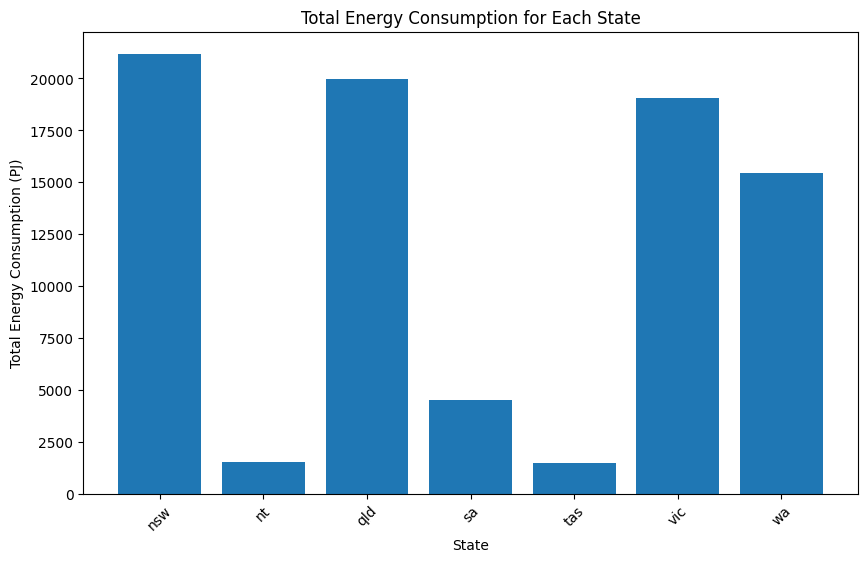

In [56]:
# Compute total energy consumption for each state using the cleaned_df dataframe
cleaned_df.loc[:, 'total_energy_consumption'] = (
    cleaned_df.loc[:, 'Coal (PJ)'] +
    cleaned_df.loc[:, 'Oil (PJ)'] +
    cleaned_df.loc[:, 'Gas (PJ)'] +
    cleaned_df.loc[:, 'Renewables (PJ)']
)

# Group by state and sum the total energy consumption
state_energy_df = cleaned_df.groupby('State', as_index=False)['total_energy_consumption'].sum()

# Check if any states are missing after grouping
print(state_energy_df)

# Visualize the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
plt.bar(state_energy_df['State'], state_energy_df['total_energy_consumption'])
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption for Each State')
plt.xticks(rotation=45)
plt.show()

Grouping: We grouped the data by state. The groupby() function was used for grouping.

Aggregation: We summed up the energy consumption values across different energy sources ('Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)') for each row in the Cleaned DataFrame. This was done using the loc accessor to select the relevant columns and perform element-wise addition.

The parameter as_index=False is used to ensure that the grouped column ('State') is not set as the index of the resulting DataFrame.

Then we visualized the total energy consumption for each state using a bar plot. The 'State' column is used as the x-axis, and the 'total_energy_consumption' column was used as the y-axis. Labels and titles were added to the plot for clarity, and plt.xticks(rotation=45) was used to rotate the x-axis labels for better readability.

## **Task 2: Compute and visualize the total energy consumption by fuel type.**

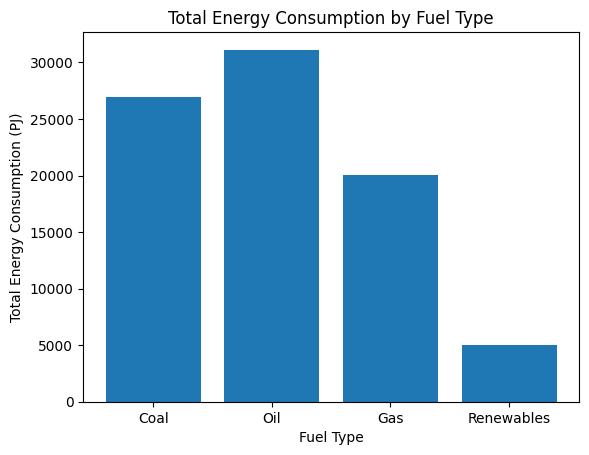

In [52]:
# Compute total energy consumption by fuel type using the cleaned DataFrame
total_energy_consumption = cleaned_df[["Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)"]].sum()

# Create a new DataFrame to hold the results
fuel_energy_df = pd.DataFrame({
    "fuel_type": ["Coal", "Oil", "Gas", "Renewables"],
    "total_energy_consumption": total_energy_consumption.values
})

# Visualize the data
plt.bar(fuel_energy_df['fuel_type'], fuel_energy_df['total_energy_consumption'])
plt.xlabel('Fuel Type')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type')
plt.show()

Grouping: We selected the columns representing different energy sources ("Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)") from the cleaned DataFrame (cleaned_df).

Aggregation: We then used the sum() function to calculate the total energy consumption across all rows for each energy source. The result was stored in a Series called total_energy_consumption.

Then we created a new DataFrame (fuel_energy_df) to hold the results of the total energy consumption by fuel type. We constructed this DataFrame using a dictionary where the keys are the column names ("fuel_type", "total_energy_consumption") and the values were lists containing the fuel types and their respective total energy consumption values.

Finally, we visualized the total energy consumption by fuel type using a bar plot. The 'fuel_type' column was used as the x-axis, and the 'total_energy_consumption' column was used as the y-axis. Labels and titles were added to the plot for clarity, and plt.show() displays the plot.

## **Task 3: Analyze and plot the total energy consumption fuel types for each year.**

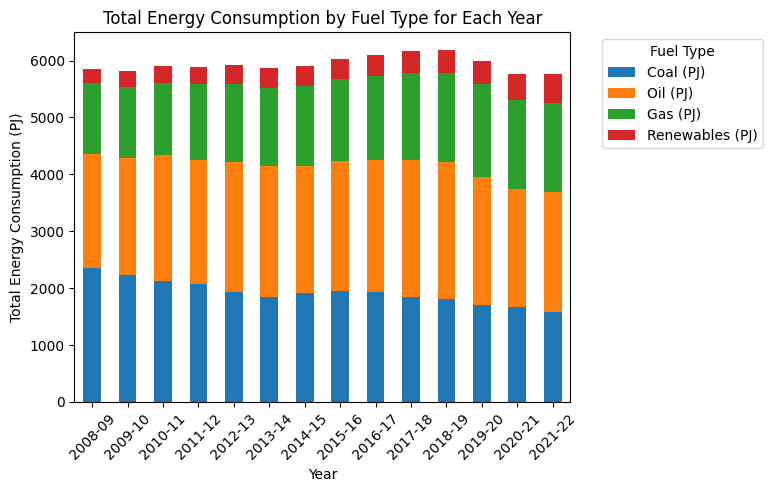

In [53]:
# Group the cleaned DataFrame by Year and sum the energy consumption for each fuel type
yearly_energy_df = cleaned_df.groupby('Year').agg({
    "Coal (PJ)": "sum",
    "Oil (PJ)": "sum",
    "Gas (PJ)": "sum",
    "Renewables (PJ)": "sum"
}).reset_index()

# Plot the data
yearly_energy_df.plot(x='Year', kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type for Each Year')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Grouping: We used the groupby function to group the cleaned_df DataFrame by the 'Year' column.

Aggregation: We used the agg function to aggregate the grouped data. For each group (i.e., each year), we calculate the sum of energy consumption for each fuel type specified in the dictionary passed to agg.

The result was stored in a new DataFrame called yearly_energy_df. The reset_index() function was used to reset the index of the DataFrame to make 'Year' a regular column instead of an index.

Finally we plotted the total energy consumption by fuel type for each year using a stacked bar plot. The 'Year' column was used as the x-axis, and each fuel type's total energy consumption was represented as a stacked bar. Labels and titles were added to the plot for clarity, and a legend was included to identify the different fuel types. plt.show() displays the plot.

## **Task 4: Analyze and visualize the total energy consumption for each state for each year.**

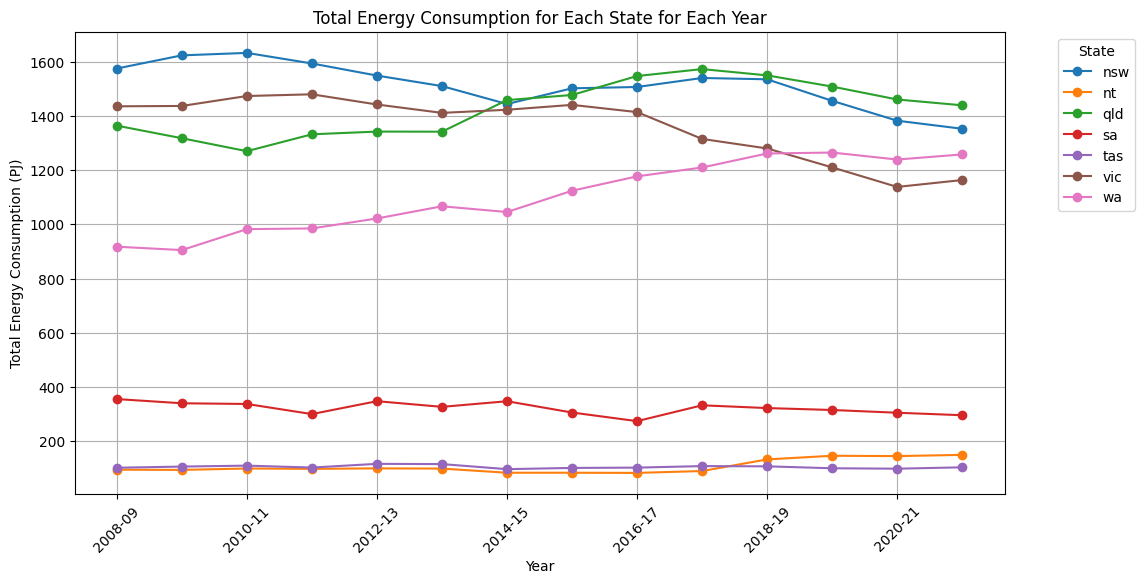

In [54]:
# Group the cleaned DataFrame by Year and State and sum the energy consumption
state_year_energy_df = cleaned_df.groupby(['Year', 'State']).agg({
    "Coal (PJ)": "sum",
    "Oil (PJ)": "sum",
    "Gas (PJ)": "sum",
    "Renewables (PJ)": "sum"
}).reset_index()

# Calculate the total energy consumption by summing all fuel types
state_year_energy_df['total_energy_consumption'] = state_year_energy_df.iloc[:, 2:].sum(axis=1)

# Pivot the DataFrame for better visualization
state_year_pivot = state_year_energy_df.pivot(index='Year', columns='State', values='total_energy_consumption')

# Plot the data
state_year_pivot.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption for Each State for Each Year')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Grouping: We used the groupby function to group the cleaned_df DataFrame by both the 'Year' and 'State' columns.

Aggregation: We used the agg function to aggregate the grouped data. For each group (i.e., each combination of year and state), we calculated the sum of energy consumption across all fuel types (columns 2 onward) for each row. This total was added as a new column named 'total_energy_consumption' in the state_year_energy_df DataFrame.

Then the result was stored in a new DataFrame called state_year_energy_df. The reset_index() function was used to reset the index of the DataFrame to make 'Year' and 'State' regular columns instead of being part of the index.

The pivot function was used to reshape the DataFrame such that each state became a separate column, and the index became the 'Year'. This reshaping facilitated visualization and analysis.

Finally, this block of code plotted the total energy consumption for each state for each year using a line plot. Each state was represented by a separate line, and each data point represented the total energy consumption for that state in a particular year. Labels and titles were added to the plot for clarity, and a legend was included to identify the different states. In the end, plt.show() displayed the plot.

# **Group B**

## **Task 5: Analyze and visualize the total energy consumption for each state, broken down by fuel type.**

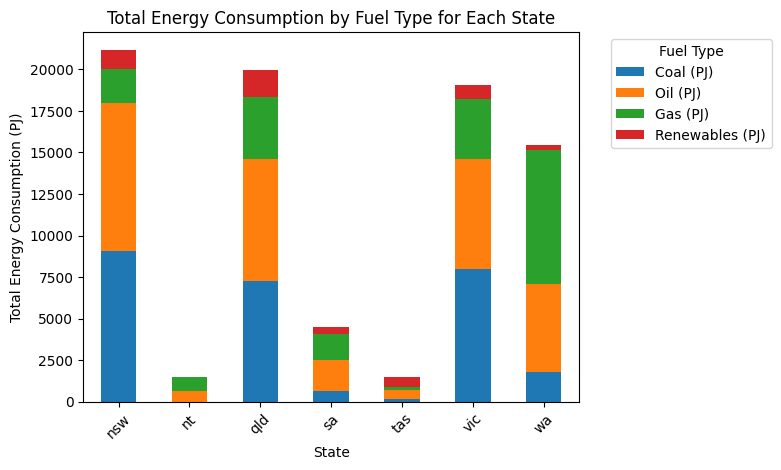

In [57]:
# Compute total energy consumption for each state and fuel type using the cleaned_df DataFrame
state_fuel_energy_df = cleaned_df.groupby('State').agg({
    "Coal (PJ)": "sum",
    "Oil (PJ)": "sum",
    "Gas (PJ)": "sum",
    "Renewables (PJ)": "sum"
}).reset_index()

# Plot the data
state_fuel_energy_df.plot(x='State', kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type for Each State')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


Grouping: We used the groupby function to group the cleaned_df DataFrame by the 'State' column.

Aggregation: The agg function was used to aggregate the grouped data. For each state, we calculated the sum of energy consumption for each fuel type specified in the dictionary passed to agg.

The reset_index() function was used to reset the index of the DataFrame to make 'State' a regular column instead of being part of the index.

Finally we plotted the total energy consumption for each state broken down by fuel type using a stacked bar plot. Labels, titles, and legends were added for clarity.

# **Group C**

## **Task 9: Analyse and compare the growth rate of the GSP and the consumption of renewable energy for each state.**

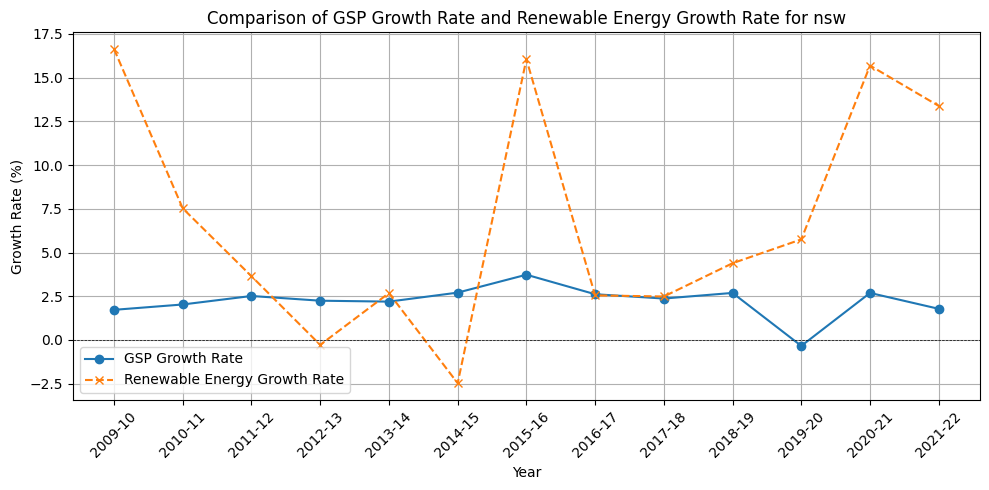

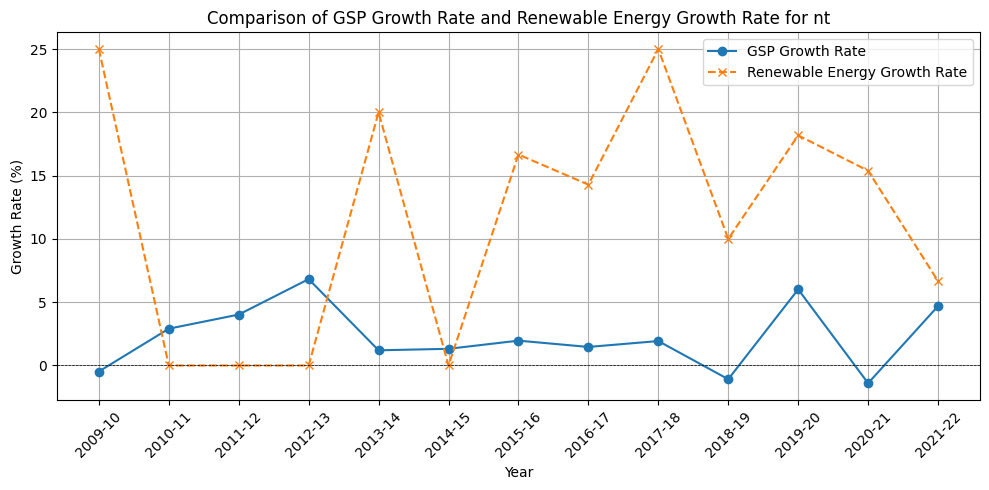

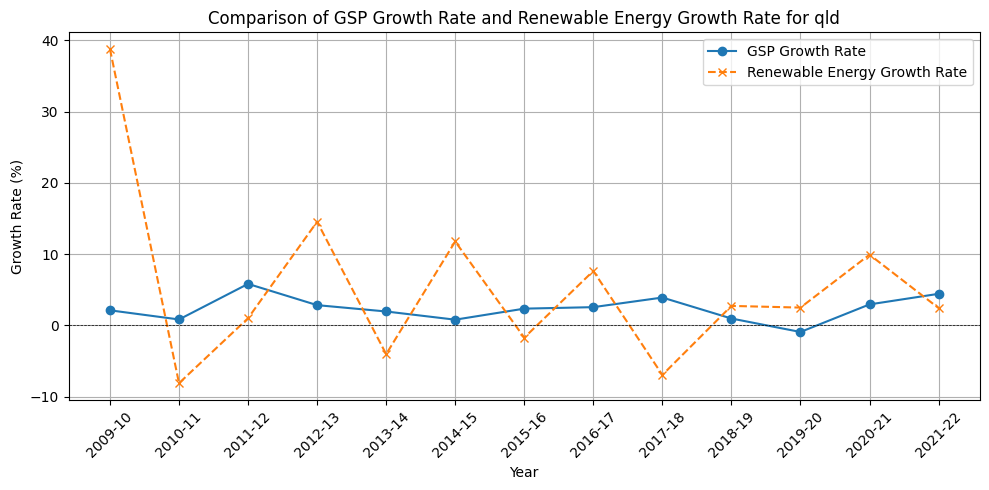

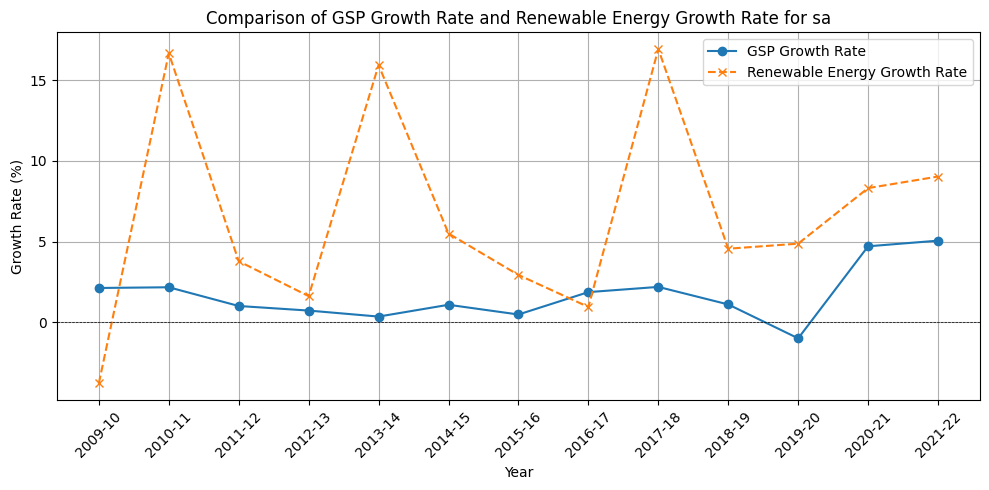

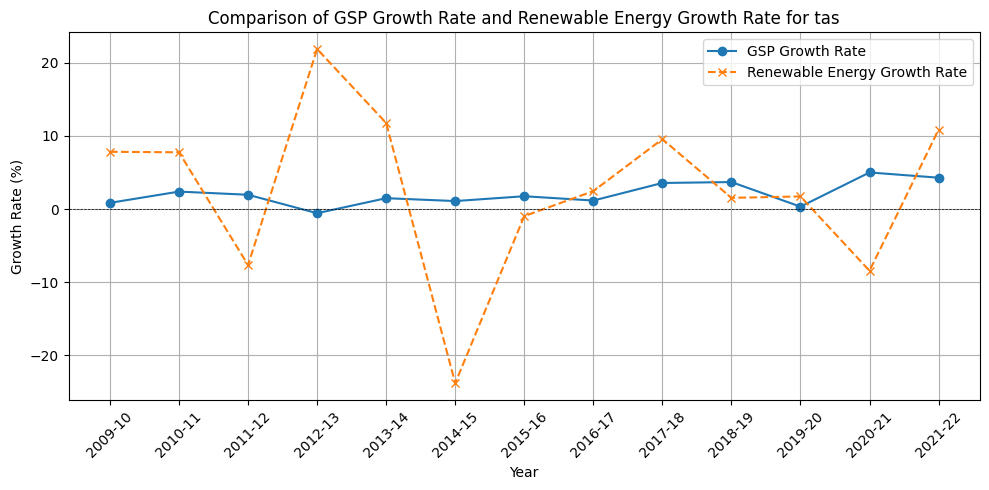

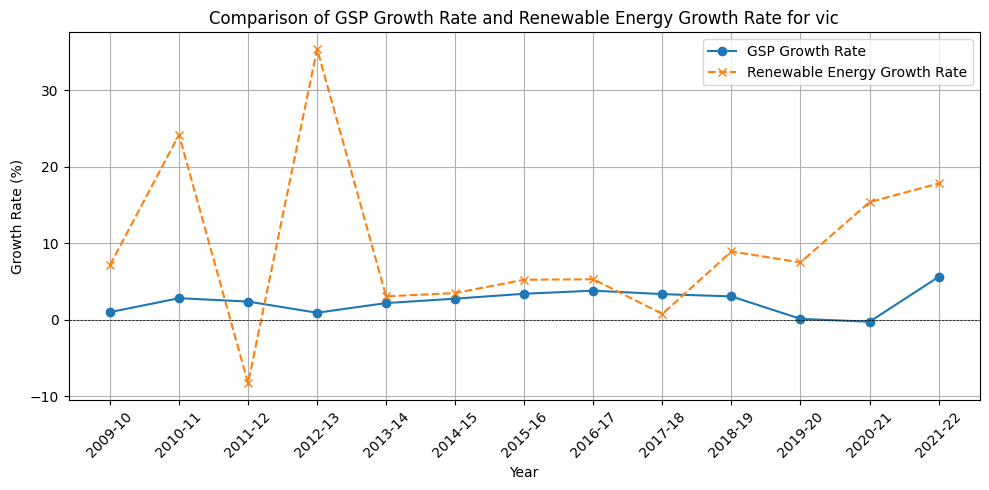

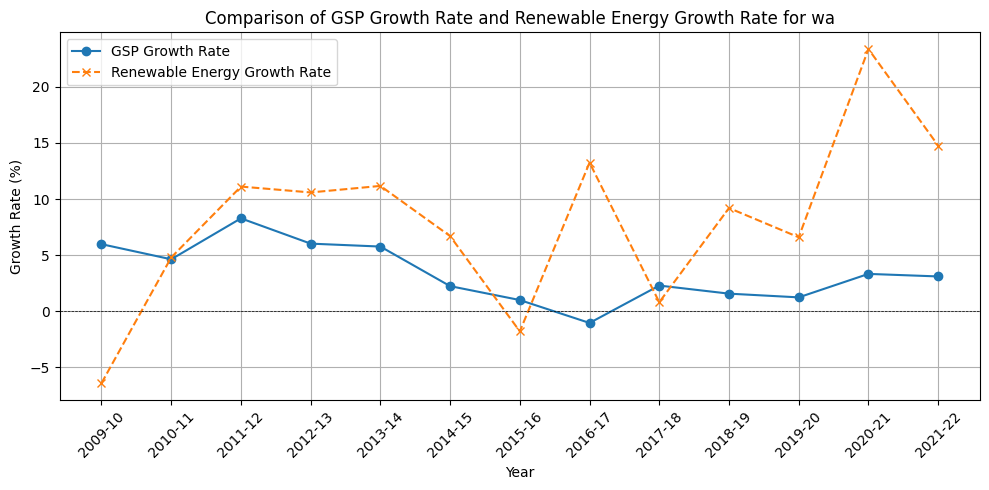

In [58]:
# Step 1: Calculate growth rates using the cleaned_df DataFrame
cleaned_df['gsp_growth_rate'] = cleaned_df.groupby('State')["GSP ($ million)"].pct_change() * 100
cleaned_df['renewables_growth_rate'] = cleaned_df.groupby('State')["Renewables (PJ)"].pct_change() * 100

# Drop the first row of each state group which will have NaN values for growth rates
growth_rate_df = cleaned_df.dropna(subset=['gsp_growth_rate', 'renewables_growth_rate'])

# Step 2: Plot the data for each state
for state, state_data in growth_rate_df.groupby('State'):
    plt.figure(figsize=(10, 5))

    # Plot GSP Growth Rate
    plt.plot(state_data['Year'], state_data['gsp_growth_rate'], marker='o', label='GSP Growth Rate')

    # Plot Renewable Energy Growth Rate
    plt.plot(state_data['Year'], state_data['renewables_growth_rate'], marker='x', linestyle='--', label='Renewable Energy Growth Rate')

    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.title(f'Comparison of GSP Growth Rate and Renewable Energy Growth Rate for {state}')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Grouping: We grouped the DataFrame by the 'State' column and selected the 'Renewables (PJ)' column. It created groups of data for each unique state.

Aggregation: We used pct_change() function to calculate the percentage change between each element and the previous element in the group. It computed the growth rate of renewable energy consumption over time for each state.

We also multiplied the percentage change values by 100 to convert them into percentage format.

[The calculation of percentage change (pct_change()) inherently introduces NaN values for the first row of each group. This is because there is no previous value to compare with for the first row in each group. So we dropped those irrelevant NaN values.]

Finally we iterated over each state group in the growth_rate_df DataFrame, in order to combine these grouping and aggregation and plotted the GSP growth rate and renewable energy growth rate over the years for each state for better individual visualization as well as analysis of the data.

